# Year Prediction for Songs

Second part of the project is bringing ANN in. We have utilized the code of the textbook we have been reading, which can be found [here](http://neuralnetworksanddeeplearning.com/chap3.html). We have modified loader script so that it loads the Million Song Dataset instead.

We will try several things:

- Artificial Neural Network with no Hidden Layer (Naive Try)
- Deep Neural Network
- A more complex Convolutional Neural Network Structure


# (1) Artificial Neural Network with no Hidden Layer


As explained above, we have modified the loader script. The code will start by calling the piece that loads the data.

In [1]:
import loader
import network2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

training_data, test_data = loader.load_data_wrapper()

In [83]:
#30 epoch of Shallow NN - 90 years

reload(network2)
net = network2.Network([90,90], cost=network2.CrossEntropyCost) 
net.large_weight_initializer()
net.SGD(training_data, test_data, epochs=30, eta=0.5, lmbda=0.1)

epoch, diff, sqdiff, accuracy
0 0.161307227093 0.21776623565 0.037129575828
1 0.13884293384 0.243327968045 0.0304086771257
2 0.438814425025 0.570790371965 0.00838659693976
3 0.133050203805 0.152480808988 0.0171024598102
4 0.098892726335 0.153036862174 0.0764090644974
5 0.147475664136 0.1645683024 0.0140228549293
6 0.0914075302444 0.139527746748 0.052353282975
7 0.443564080634 0.56978276814 0.0102266124346
8 0.193655374129 0.321082981624 0.0253922138292
9 0.148348991419 0.261821920627 0.0746852605075
10 0.136225128235 0.159823958236 0.0233004067403
11 0.671665284751 0.751695732305 0.00838659693976
12 0.234794682127 0.276940115587 0.012996319969
13 0.116480488872 0.182024855018 0.0638194847957
14 0.0998030497903 0.15313963796 0.0481696687972
15 0.0975221269752 0.142046509743 0.0447026922332
16 0.176491979448 0.318789562272 0.0371876815805
17 0.579978759845 0.680189298818 0.010885144296
18 0.111571532099 0.137211942562 0.0281425527794
19 0.22863329612 0.361164928437 0.0343598682936
20 0.3

In [87]:
#30 epoch of Deep NN - 90 years

reload(network2)
net = network2.Network([90,2,90], cost=network2.CrossEntropyCost) 
net.large_weight_initializer()
net.SGD(training_data, test_data, epochs=30, eta=0.5, lmbda=0.1)

epoch, diff, sqdiff, accuracy
0 0.115337078652 0.172321971205 0.077
1 0.115337078652 0.172321971205 0.077
2 0.110685393258 0.165620797927 0.049
3 0.129651685393 0.187033601216 0.112
4 0.110685393258 0.165620797927 0.049
5 0.107134831461 0.159430640167 0.09
6 0.107134831461 0.159430640167 0.09
7 0.105157303371 0.148833362445 0.016
8 0.121719101124 0.179476929397 0.069
9 0.121719101124 0.179476929397 0.069
10 0.115337078652 0.172321971205 0.077
11 0.115337078652 0.172321971205 0.077
12 0.107134831461 0.159430640167 0.09
13 0.115337078652 0.172321971205 0.077
14 0.107134831461 0.159430640167 0.09
15 0.121719101124 0.179476929397 0.069
16 0.110685393258 0.165620797927 0.049
17 0.105606741573 0.153813207217 0.048
18 0.107134831461 0.159430640167 0.09
19 0.107134831461 0.159430640167 0.09
20 0.115337078652 0.172321971205 0.077
21 0.110685393258 0.165620797927 0.049
22 0.115337078652 0.172321971205 0.077
23 0.121719101124 0.179476929397 0.069
24 0.121719101124 0.179476929397 0.069
25 0.110685

As it can be seen, the results are very bad, our accuracy goes between 2%-5%, with maximum 6.99%. And the cost was always "infinite", whether the cost function was a sq. or cross entropy.

# (2) Deep Neural Network

The only difference here is to go from [90,90] to [90,30,90].

In [ ]:
net = network2.Network([90,30,90], cost=network2.CrossEntropyCost) 
net.large_weight_initializer()

evaluation_cost, evaluation_accuracy, training_cost, training_accuracy =\
    net.SGD(training_data, 30, 10, 0.5,
        evaluation_data=test_data, lmbda = 0.1,
        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True,
        monitor_training_cost=True, monitor_training_accuracy=True)

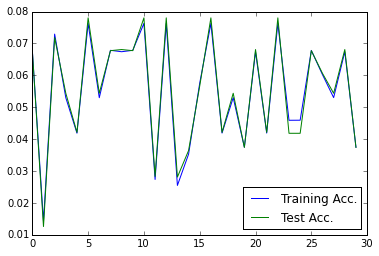

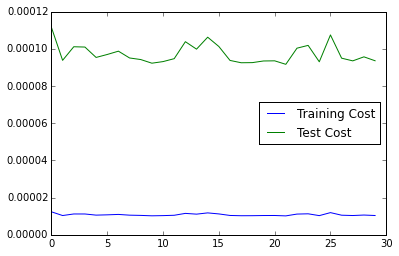

In [32]:
#30 epoch of Deep NN

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

training_accuracy = np.array([31452, 6606, 33825, 24574, 19419, 35374, 24574, 31465, 31262, 31462, 35384, 12680, 35376, 11816, 16359, 26693, 35382, 19436, 24584, 17371, 31258, 19433, 35382, 21292, 21303, 31454, 27926, 24588, 31252, 17375]).astype(float)
evaluation_accuracy = np.array([3498, 650, 3710, 2808, 2175, 4029, 2808, 3498, 3516, 3498, 4029, 1461, 4029, 1451, 1880, 2927, 4029, 2175, 2808, 1931, 3516, 2175, 4029, 2160, 2160, 3498, 3130, 2808, 3516, 1931]).astype(float)
training_cost = np.array([5.7283112983237796, 4.8033541359119019, 5.1932558794930266, 5.1892527989240094, 4.9051238310286873, 4.9781750825655076, 5.0795370809438616, 4.8948385540726962, 4.8359232470777185, 4.7359558265867943, 4.7829262469983291, 4.8690878214640945, 5.3379189562762255, 5.1495440681666098, 5.4621364331180917, 5.204772536502837, 4.8227385437011083, 4.7553818635169449, 4.7650327348334596, 4.8043596587935395, 4.8150343891485008, 4.7167512430189635, 5.1662904869796797, 5.2340412977201165, 4.7812833522836167, 5.5299277050760196, 4.884955157258914, 4.8045492126481602, 4.9244195332971135, 4.8070498920543834]).astype(float)
evaluation_cost = np.array([5.7549867095732994, 4.8426825603677095, 5.2199347098679043, 5.2114212295768985, 4.9232706724425732, 5.0053529092627542, 5.0972940999561871, 4.9084981768386893, 4.8647139081333286, 4.7635804181538166, 4.8079358201127214, 4.8891348025388064, 5.3605352241013238, 5.1532963582671663, 5.4850514805737873, 5.2269841970624213, 4.8400956409043641, 4.7758767311570125, 4.7793186268704604, 4.8249411015315884, 4.8292398308990112, 4.7320816228174385, 5.1801643394535022, 5.2578119909576149, 4.8025736921113893, 5.5477861633215628, 4.9026668337834103, 4.8280741209235893, 4.9398427898025057, 4.830814724568631]).astype(float)

training_accuracy   /= 463715
evaluation_accuracy /= 51630
training_cost   /= 463715
evaluation_cost /= 51630


plt.plot(xrange(0,30),training_accuracy,label="Training Acc.")
plt.plot(xrange(0,30),evaluation_accuracy,label="Test Acc.")
plt.legend(loc=0)
plt.show()

plt.plot(xrange(0,30),training_cost,label="Training Cost")
plt.plot(xrange(0,30),evaluation_cost,label="Test Cost")
plt.legend(loc=0)
plt.show()

So, we are still not getting the results we want..

# (3) Convolutional Neural Networks

In order to run this part, we need to install dependencies such as Theano.

In [ ]:
# import network3
# from network3 import Network
# from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
# training_data, validation_data, test_data = network3.load_data_shared()
# mini_batch_size = 10
# net = Network([
#         FullyConnectedLayer(n_in=90, n_out=100),
#         SoftmaxLayer(n_in=100, n_out=90)], mini_batch_size)
# net.SGD(training_data, 60, mini_batch_size, 0.1, 
#         validation_data, test_data)